# Проект "Рынок заведений общественного питания Москвы"

Данный проект посвящен анализу заведений общественного питания Москвы, с целью целесообразности открытия нового формата заведения. Поскольку проект дорогой, необходимо провести исследование рынка.



План работы:
1. [Изучить общую информацию о данных и выполнить предообработку;](#start)
2. [Провести исследовательский анализ данных, построить графики;](#research_analysis)
     - [исследовать соотношение видов объектов общественного питания по количеству;](#count)    
     - [исследовать соотношение сетевых и несетевых заведений по количеству;](#rest_chain_count)
     - [исследовать для какого вида объекта общественного питания характерно сетевое распространение;](#rest_object)
     - [проанализировать что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?](#analys_chain)
     - [для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?](#chain_mean)
     - [построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#top_street)
     - [найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?](#top_street_okrug)
     - [посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания, выявить закономерности.](#top_street_number)
3. [Сделать общий вывод и дать рекомендации о виде заведения, количестве посадочных мест, а также районе расположения. Прокомментировать возможность развития сети.](#resume)
4. [Подготовить презентацию](#presentation)

Описание данных:
    - Таблица rest_data:
        - id — идентификатор объекта;
        - object_name — название объекта общественного питания;
        - chain — сетевой ресторан;
        - object_type — тип объекта общественного питания;
        - address — адрес;
        - number — количество посадочных мест
   
 Данные содержатся в csv файле  /datasets/rest_data.csv    


## 1. Изучение общей информации <a id="start"> </a>

In [1]:
import pandas as pd # <импорт библиотеки pandas>

import matplotlib.pylab as plt # <импорт библиотеки matplotlib>
import numpy as np # <импорт библиотеки numpy>
import seaborn as sns #<импорт библиотеки seaborn>
import scipy.stats as st  # <импорт scipy.stats>
from IPython.display import display# <импорт метода display из библиотеки IPython.display для просмотра таблиц>
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
import pylab as pl
init_notebook_mode(connected=True)
import plotly.express as px
import plotly.graph_objects as go
import re

Прочитаем файл rest_data.csv

In [2]:
path = 'E:/'


In [3]:
rest_data = pd.read_csv(path + 'rest_data.csv') # <чтение файла с данными с сохранением их в переменной rest_data>

Посмотрим таблицу rest_data , выведем ее на экран

In [4]:
display(rest_data)#<вывод таблицы на экран>

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Посмотрим общую информацию о таблице rest_data

In [5]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


В таблице 15366 строк и 6 столбцов, пропущенные значения отсуствуют, это хорошо. Заголовки указаны корректно, типы данных тоже. Проверим данные на дубликаты

Проверим датасет на наличие полных дубликатов

In [6]:
print('количество дубликатов в таблице rest_data:', rest_data.duplicated().sum())

количество дубликатов в таблице rest_data: 0


Посмотрим на наличие дубликатов по ключевым признакам (все кроме id)

In [7]:
key = ['object_name', 'chain', 'object_type', 'address', 'number']
rest_data_dedupped = rest_data.drop_duplicates(subset=key)

print(rest_data.shape)
print(rest_data_dedupped.shape)

(15366, 6)
(15284, 6)


Действительно в таблице было 82 дубликата, мы их удалили, вероятно данные заполнялись вручную и были допущены повторы

Посмотрим на гистограмму по количеству посадочных мест

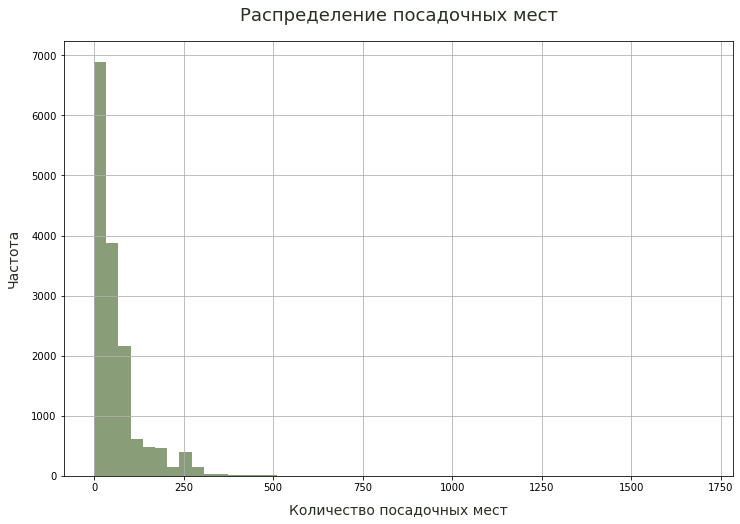

In [8]:
plt.figure(figsize=(12,8))
rest_data_dedupped['number'].hist(bins=50, color='#8a9d79') 
plt.title('Распределение посадочных мест', fontsize=18, color='#292f24', pad=20)
plt.ylabel('Частота', fontsize=14, color='#292f24', labelpad=10)
plt.xlabel('Количество посадочных мест', fontsize=14, color='#292f24', labelpad=10)
plt.show()

Присутствуют заведения, в которых более 1000 посадочных мест, посмотрим на срез

In [9]:
rest_data_dedupped[rest_data_dedupped['number'].between(1000, 1750, inclusive = True)].sort_values(by='number', ascending=False)

,id,object_name,chain,object_type,address,number
12723,199696,Arena by Soho Family,нет,бар,"город Москва, Кутузовский проспект, дом 36, ст...",1700
8148,80291,Банкетный зал Шелк,нет,ресторан,"город Москва, Большой Саввинский переулок, дом...",1500
8345,27750,СТОЛОВАЯ-БУФЕТ,нет,столовая,"город Москва, улица Волхонка, дом 15",1400
9064,19719,КОМБИНАТ ПИТАНИЯ «УПРАВЛЕНИЕ АКАДЕМСЕРВИС»,нет,столовая,"город Москва, проспект Вернадского, дом 84, ст...",1288
3686,27026,РУМ СЕРВИС,нет,ресторан,"город Москва, площадь Европы, дом 2",1200
4480,27024,РУМ СЕРВИС,нет,ресторан,"город Москва, Кутузовский проспект, дом 2/1, с...",1200
2313,26560,Ресторан «АЛЬФА»,нет,ресторан,"город Москва, Измайловское шоссе, дом 71, корп...",1040


Это действительно заведения с большоей площадью и вместимостью, позволяющие проводить банкеты на такое количество гостей, информация проверена в сторонних источниках.

## Вывод

В таблице отсутсвуют пропущенные значения, это очень хорошо, можем быть уверены что выгружены полные данные. Названия столбцов также корректны, дубликаты отсутвуют. Типы данных также верны. Также была построена гистограмма, отражающая распределения числа посадочных мест, выявлены заведения с числом посадочных мест свыше 1000, при рассмотрении среза выявлено, что данные корректные, их нельзя назвать выбросами.


## 2. Исследовательский анализ данных<a id="research_analysis"></a> 

### 2.1 Соотношение видов объектов общественного питания по количеству <a id="count"></a> 

Посмотрим на список уникальных видов объектов общественного питания

In [10]:
rest_data_dedupped['object_type'].unique()

array(['кафе', 'столовая', 'закусочная',
       'предприятие быстрого обслуживания', 'ресторан', 'кафетерий',
       'буфет', 'бар', 'магазин (отдел кулинарии)'], dtype=object)

Всего у нас 9 уникальных видов, построим сводную таблицу, в которой посчитаем количество заведений каждого вида, а затем построим график

In [11]:
rest_object = rest_data_dedupped.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count').sort_values(by= 'id', ascending = False).reset_index()
rest_object 

,object_type,id
0,кафе,6071
1,столовая,2584
2,ресторан,2282
3,предприятие быстрого обслуживания,1898
4,бар,855
5,буфет,577
6,кафетерий,395
7,закусочная,349
8,магазин (отдел кулинарии),273


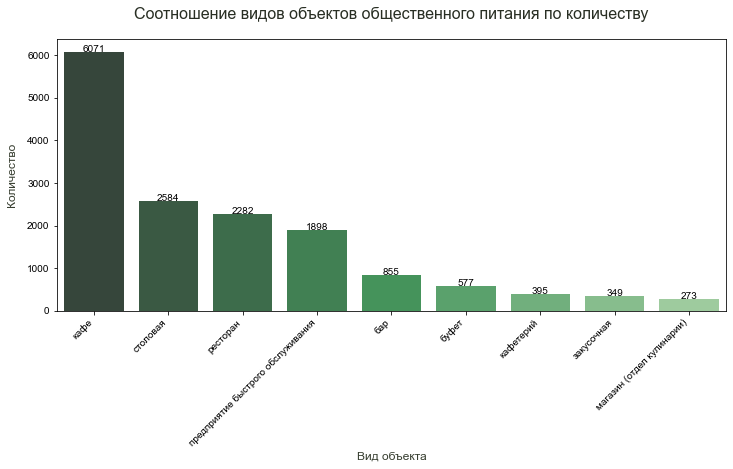

In [12]:
plt.figure(figsize=(12, 5))
pal = sns.color_palette("Greens_d", len(rest_object))
rank = rest_object["id"].argsort().argsort() 
g=sns.barplot(x="object_type", y="id", data=rest_object, palette=np.array(pal[::-1])[rank])
sns.set_style('darkgrid')

plt.title('Соотношение видов объектов общественного питания по количеству', fontsize=16, color='#292f24', pad = 20)
plt.xlabel('Вид объекта', fontsize=12, color='#373e30')
plt.ylabel('Количество', fontsize=12, color='#373e30', labelpad=10)
plt.xticks(rotation=45, ha='right')
for index, row in rest_object.iterrows():
    g.text(row.name,row.id, round(row.id,2), color='black', ha="center")
plt.show()

Самый распростаненный вид это кафе, заведений такого типа в нашей выборке рекордные 6071 штук, следующие по распространенности это столовая - 2584, ресторан - 2282 и предприятия быстрого обслуживания - 1898, меньше всего отделов кулинарии - 273 штуки.

### 2.2 Соотношение сетевых и несетевых заведений по количеству<a id="rest_chain_count"></a> 

Построим график соотношения сетевых и несетевых заведений, для этого сделаем сводную таблицу

In [13]:
rest_chain = rest_data_dedupped.pivot_table(index = 'chain', values = 'id', aggfunc = 'count').sort_values(by= 'id', ascending = False).reset_index()
rest_chain 

,chain,id
0,нет,12320
1,да,2964


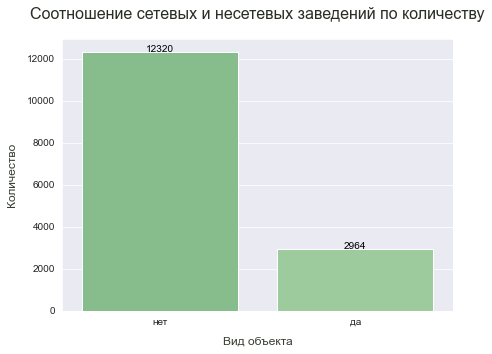

In [14]:
plt.figure(figsize=(7, 5))
pal = sns.color_palette("Greens_d", len(rest_object))
rank = rest_chain["id"].argsort().argsort() 
g=sns.barplot(x="chain", y="id", data=rest_chain, palette=np.array(pal[::-1])[rank])
sns.set_style('darkgrid') 
plt.title('Соотношение сетевых и несетевых заведений по количеству', fontsize=16, color='#292f24', pad = 20)
plt.xlabel('Вид объекта', fontsize=12, color='#373e30', labelpad=10)
plt.ylabel('Количество', fontsize=12, color='#373e30', labelpad=10)
for index, row in rest_chain.iterrows():
    g.text(row.name,row.id, round(row.id,2), color='black', ha="center")
plt.show()

Преобладают несетевые заведения их 12320, тогда как сетевых 2964

### 2.3 Исследовать для какого вида объекта общественного питания характерно сетевое распространение<a id="rest_object"></a> 

Сформируем сводную таблицу с указанием количества сетевых и несетевых заведений по каждом виду объекта

In [15]:
rest_object_chain = rest_data_dedupped.pivot_table(index = 'object_type', columns = 'chain', values = 'id', aggfunc = {'chain':'count','id':'count'}) \
                .reset_index() \
                .rename(columns={'chain':'index', 'да':'chain_yes', 'нет':'chain_no'})
rest_object_chain['total_count']=rest_object_chain['chain_yes'] + rest_object_chain['chain_no']
rest_object_chain

chain,object_type,chain_yes,chain_no,total_count
0,бар,37,818,855
1,буфет,11,566,577
2,закусочная,56,293,349
3,кафе,1396,4675,6071
4,кафетерий,52,343,395
5,магазин (отдел кулинарии),78,195,273
6,предприятие быстрого обслуживания,788,1110,1898
7,ресторан,543,1739,2282
8,столовая,3,2581,2584


Рассчитаем долю сетевых и несевых заведений в общем количестве в разрезе видов объектов общепита и отсортируем таблицу по доле сетевых заведений по убыванию

In [16]:
rest_object_chain['ratio_chain_yes'] = (rest_object_chain['chain_yes'] / rest_object_chain['total_count'] *100).round(2)
rest_object_chain['ratio_chain_no'] = (rest_object_chain['chain_no'] / rest_object_chain['total_count'] *100).round(2)
rest_object_chain=rest_object_chain.sort_values(by='ratio_chain_yes', ascending=False)
rest_object_chain

chain,object_type,chain_yes,chain_no,total_count,ratio_chain_yes,ratio_chain_no
6,предприятие быстрого обслуживания,788,1110,1898,41.52,58.48
5,магазин (отдел кулинарии),78,195,273,28.57,71.43
7,ресторан,543,1739,2282,23.79,76.21
3,кафе,1396,4675,6071,22.99,77.01
2,закусочная,56,293,349,16.05,83.95
4,кафетерий,52,343,395,13.16,86.84
0,бар,37,818,855,4.33,95.67
1,буфет,11,566,577,1.91,98.09
8,столовая,3,2581,2584,0.12,99.88


Построим график

In [17]:

fig = go.Figure()
fig.add_trace(go.Bar(
    x=rest_object_chain.object_type,
    y=rest_object_chain.ratio_chain_yes,
    name='Сетевой',
    marker_color='#454e3c'    
))
fig.add_trace(go.Bar(
    x=rest_object_chain.object_type,
    y=rest_object_chain.ratio_chain_no,
    name='Несетевой',
    marker_color='#8a9d79'
))


fig.update_layout(barmode='group', xaxis_tickangle=-45, title='Распределение заведений в разрезе видов с указанием типа сетевой/несетевой', xaxis_title='Вид заведения',
                 yaxis_title='Доля заведений', hovermode="x")
fig.show()


Больше всего сетевое распространение характерно для предприятий быстрого обслуживания, сети в этом виде общепита составляют 41,52%, также распространены сетевые магазины с отделами кулинарии 28,57%, у ресторанов и кафе примерно одинаковая доля сетей у ресторанов 23,79%, кафе 22,99%. Буфеты и столовые практически не представлены в сетевом формате.

### 2.4 Проанализировать что характерно для сетевых заведений: много заведений с небольшим числом посадочных мест в каждом или мало заведений с большим количеством посадочных мест?<a id="analys_chain"></a> 

Сделаем срез из общей таблицы, выберем только сетевые заведения

In [18]:
rest_data_chain = rest_data_dedupped[rest_data_dedupped['chain'] == 'да']
rest_data_chain

,id,object_name,chain,object_type,address,number
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
13,22579,Алло Пицца,да,кафе,"город Москва, улица Авиаторов, дом 14",32
16,144107,Суши Wok,да,предприятие быстрого обслуживания,"город Москва, Азовская улица, дом 3",7
18,58565,Тануки,да,ресторан,"город Москва, Большая Академическая улица, дом 65",160
...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36


Проведем группировку по названиям заведений с указанием их количества в сети и укажем медиану количества посадочных мест

In [19]:
count_object = rest_data_chain.groupby('object_name').agg({'object_name' : 'count', 'number' : 'median'}).rename(columns={'object_name':'count'})


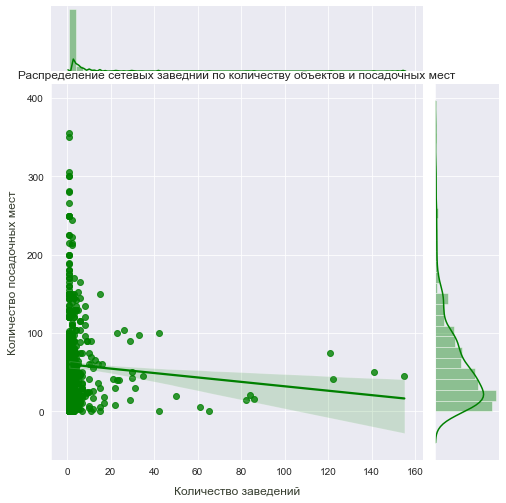

In [20]:

sns.jointplot(x='count', y='number', data=count_object, kind='reg', color='green', height=7)
plt.title('Распределение сетевых заведний по количеству объектов и посадочных мест')
plt.xlabel('Количество заведений', fontsize=12, color='#373e30', labelpad=10)
plt.ylabel('Количество посадочных мест', fontsize=12, color='#373e30', labelpad=10)

plt.show()


Для сетевых заведений характерно большее количество заведений с меньшим числом посадочных мест.

### 2.5 Для каждого вида объекта общественного питания описать среднее количество посадочных мест. Какой вид предоставляет в среднем самое большое количество посадочных мест?<a id="chain_mean"></a> 

In [21]:
count_object_total = rest_data_dedupped.groupby('object_type').agg({'object_type':'count', 'number' : 'median'}).rename(columns={'object_type':'count'}) \
                    .sort_values(by='number', ascending=False) \
                    .reset_index()
count_object_total

,object_type,count,number
0,столовая,2584,103
1,ресторан,2282,80
2,бар,855,35
3,буфет,577,32
4,кафе,6071,30
5,кафетерий,395,6
6,предприятие быстрого обслуживания,1898,6
7,закусочная,349,0
8,магазин (отдел кулинарии),273,0


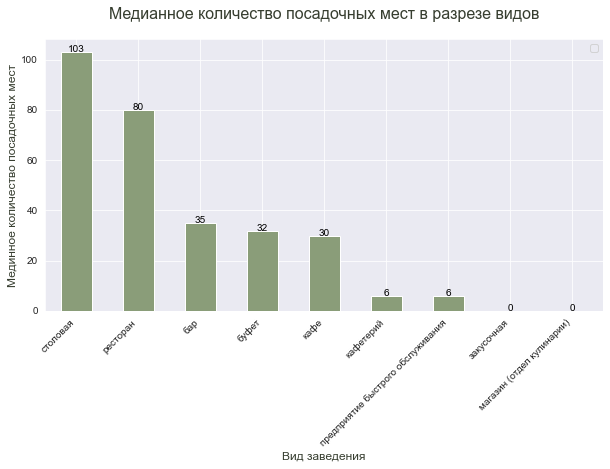

In [22]:
g=count_object_total.plot(x='object_type', y='number', kind="bar", color='#8a9d79', figsize=(10,5))
plt.title('Медианное количество посадочных мест в разрезе видов', fontsize=16, color='#373e30', pad = 20)
plt.xlabel('Вид заведения', fontsize=12, color='#373e30')
plt.ylabel('Мединное количество посадочных мест', fontsize=12, color='#373e30')
plt.xticks(rotation=45, ha='right')
plt.legend('')
for index, row in count_object_total.iterrows():
    g.text(row.name,row.number, round(row.number,2), color='black', ha="center")
plt.show()

В столовых ожидаемо больше посадочных мест в среднем, чем в остальных видах общепита - 103, также много посадочных мест в ресторанах - 80 в среднем. Бары, буфеты и кафе - примерно на одном уровне от 30 до 35 мест. А в закусочных и кулинариях посадочные места и вовсе не нужны, поскольку еда продается на вынос.

### 2.6 Построить график топ-10 улиц по количеству объектов общественного питания. Воспользоваться внешней информацией и ответьте на вопрос — в каких районах Москвы находятся эти улицы?<a id="top_street"></a> 

Выделим название улицы в отдельный столбец

In [23]:
words = ['улица','ул','переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия']

str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

rest_data_dedupped["street"] = rest_data_dedupped["address"].str.extract(str_pat, flags=re.I)

<ipython-input-23-4c78829dcbd7>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Удалим в столбце street лишние пробелы

In [24]:
rest_data_dedupped["street"].str.strip()
rest_data_dedupped

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15361,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15362,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15363,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15364,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,Киевское шоссе


Выполним группировку по названию улицы с подсчетом количества объектов на каждой, выведем топ10 улиц

In [25]:
count_object_street = rest_data_dedupped.groupby('street').agg({'id':'count'}).rename(columns={'id':'count'}) \
                    .sort_values(by='count', ascending=False) \
                    .reset_index()
top10 = count_object_street.head(10)
top10

,street,count
0,проспект Мира,204
1,Профсоюзная улица,181
2,Ленинградский проспект,170
3,Пресненская набережная,167
4,Варшавское шоссе,164
5,Ленинский проспект,147
6,проспект Вернадского,128
7,Кутузовский проспект,114
8,Каширское шоссе,111
9,Кировоградская улица,108


Вот наши улицы-рекордсмены по количеству точек общепита, больше всего заведений находится на проспекте Мира - 204, замыкает топ10 Кировогдаская улица со 110 заведениями. Проанализируем в каких районах находятся данные улицы


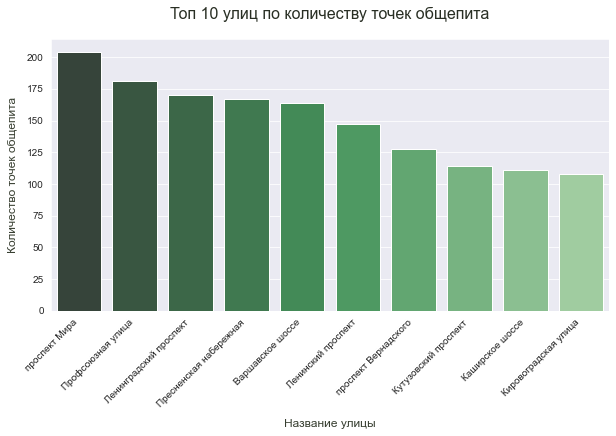

In [26]:
plt.figure(figsize=(10, 5))
pal = sns.color_palette("Greens_d", len(top10))
rank = top10["count"].argsort().argsort() 
sns.barplot(x="street", y="count", data=top10, palette=np.array(pal[::-1])[rank])
sns.set_style('darkgrid') 
plt.title('Топ 10 улиц по количеству точек общепита', fontsize=16, color='#292f24', pad = 20)
plt.xlabel('Название улицы', fontsize=12, color='#373e30', labelpad=10)
plt.ylabel('Количество точек общепита', fontsize=12, color='#373e30', labelpad=10)
plt.xticks(rotation=45, ha='right')
plt.show()

Загрузим файл mosgaz-streets.csv, в котором содержится перечень всех улиц Москвы с указанием районов

In [27]:
all_street=pd.read_csv('https://raw.githubusercontent.com/Distans/temp/main/mosgaz-streets.csv')

In [28]:
display(all_street)

,streetname,areaid,okrug,area
0,Выставочный переулок,17,ЦАО,Пресненский район
1,улица Гашека,17,ЦАО,Пресненский район
2,Большая Никитская улица,17,ЦАО,Пресненский район
3,Глубокий переулок,17,ЦАО,Пресненский район
4,Большой Гнездниковский переулок,17,ЦАО,Пресненский район
...,...,...,...,...
4393,Вознесенский проезд,17,ЦАО,Пресненский район
4394,Волков переулок,17,ЦАО,Пресненский район
4395,Поварская улица,17,ЦАО,Пресненский район
4396,Кудринская площадь,17,ЦАО,Пресненский район


Переименуем название столбца streetname	 в street, чтобы произвести объединение таблиц rest_data и df по столбцу street

In [29]:
all_street=all_street.rename(columns={'streetname':'street'})

Добавим в таблицу с top10 данные о районе, в котором находятся данные улицы

In [30]:
full_addres_top_10 = pd.merge(top10, all_street, on='street',how='inner')
full_addres_top_10

,street,count,areaid,okrug,area
0,проспект Мира,204,70,СВАО,Алексеевский район
1,проспект Мира,204,86,СВАО,Ярославский Район
2,проспект Мира,204,78,СВАО,Район Марьина роща
3,проспект Мира,204,79,СВАО,Останкинский район
4,проспект Мира,204,81,СВАО,Район Ростокино
5,проспект Мира,204,82,СВАО,Район Свиблово
6,проспект Мира,204,16,ЦАО,Мещанский район
7,Профсоюзная улица,181,123,ЮЗАО,Академический район
8,Профсоюзная улица,181,132,ЮЗАО,Район Черемушки
9,Профсоюзная улица,181,134,ЮЗАО,Район Ясенево


In [31]:
top_10_grouped = full_addres_top_10.groupby('area').agg({'street':'count', 'okrug':'first' }).rename(columns={'street':'count_street'}) \
                    .sort_values(by='count_street', ascending=False) \
                    .reset_index()
top_10_grouped

,area,count_street,okrug
0,Район Чертаново Центральное,2,ЮАО
1,Донской район,2,ЮАО
2,Ломоносовский район,2,ЮЗАО
3,Район Проспект Вернадского,2,ЗАО
4,Обручевский район,2,ЮЗАО
5,Район Теплый Стан,2,ЮЗАО
6,Район Нагатино-Садовники,2,ЮАО
7,Район Чертаново Южное,2,ЮАО
8,Район Тропарево-Никулино,2,ЗАО
9,Район Гагаринский,2,ЮЗАО


Получается, что в основном улицы из топ10 по количеству заведений находятся в на Юге либо на Юго-Западе Москвы, именно район обозначить сложно, поскольку улицы затрагивают сразу несколько райнов.

### 2.7 Найти число улиц с одним объектом общественного питания. Воспользоваться внешней информацией и ответить на вопрос — в каких районах Москвы находятся эти улицы?<a id="top_street_okrug"></a> 

In [32]:
anti_top10 = rest_data_dedupped.groupby('street').agg({'id':'count'}).rename(columns={'id':'count'}) \
                    .sort_values(by='count') \
                    .reset_index()
anti_top10 = anti_top10[anti_top10['count'] == 1]
anti_top10

,street,count
0,Гранатный переулок,1
1,Малый Путинковский переулок,1
2,Малый Полуярославский переулок,1
3,Верхняя улица,1
4,Малый Николопесковский переулок,1
...,...,...
546,5-й проезд Марьиной Рощи,1
547,Берниковская набережная,1
548,Родниковая улица,1
549,5-й проезд Подбельского,1


551 улица с одним объектом общественного питания.

Произведем объединение

In [33]:
anti_top10_full_addres = pd.merge(anti_top10, all_street, on='street',how='inner') 
display(anti_top10_full_addres.head(20))

,street,count,areaid,okrug,area
0,Гранатный переулок,1,17,ЦАО,Пресненский район
1,Малый Путинковский переулок,1,19,ЦАО,Тверской район
2,Малый Полуярославский переулок,1,18,ЦАО,Таганский район
3,Верхняя улица,1,55,САО,Район Беговой
4,Малый Николопесковский переулок,1,12,ЦАО,Район Арбат
5,Малый Лёвшинский переулок,1,20,ЦАО,Район Хамовники
6,Малый Коптевский проезд,1,54,САО,Район Аэропорт
7,Малый Саввинский переулок,1,20,ЦАО,Район Хамовники
8,улица Васильцовский Стан,1,120,ЮВАО,Рязанский район
9,Малый Конюшковский переулок,1,17,ЦАО,Пресненский район


In [34]:
anti_top10_grouped = anti_top10_full_addres.groupby('area').agg({'street':'count', 'okrug':'first' }).rename(columns={'street':'count_street'}) \
                    .sort_values(by='count_street', ascending=False) \
                    .reset_index()
anti_top10_grouped.head(10)

,area,count_street,okrug
0,Таганский район,27,ЦАО
1,Район Хамовники,26,ЦАО
2,Басманный район,25,ЦАО
3,Тверской район,20,ЦАО
4,Пресненский район,19,ЦАО
5,Район Марьина роща,18,СВАО
6,Мещанский район,17,ЦАО
7,Район Арбат,17,ЦАО
8,Район Замоскворечье,14,ЦАО
9,Район Лефортово,12,ЮВАО


В основном улицы с одним заведением общепита находятся в Таганском, Районе Хамовники и Басманном районе, центрального округа Москвы.

### 2.8 Посмотреть на распределение количества посадочных мест для улиц с большим количеством объектов общественного питания, выявить закономерности.<a id="top_street_number"></a> 

Сделаем срез по таблице rest_data, оставив в ней только улицы из топ10 по количеству объектов общепита.

In [35]:
streets = ['проспект Мира','Профсоюзная улица','Ленинградский проспект','Пресненская набережная','Варшавское шоссе'\
'Ленинский проспект','проспект Вернадского','Кутузовский проспект','Каширское шоссе','Кировоградская улица']
rest_data_streets = rest_data_dedupped.query('street in @streets')

In [36]:
display(rest_data_streets)

,id,object_name,chain,object_type,address,number,street
165,141687,Пироговая Рогова,нет,кафе,"город Москва, проспект Вернадского, дом 9/10",42,проспект Вернадского
166,148853,Кафе контдитерская Кузина,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",5,проспект Вернадского
167,149149,Суши WoK,да,кафе,"город Москва, проспект Вернадского, дом 11/19",8,проспект Вернадского
168,128511,Аморе,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",10,проспект Вернадского
169,24875,Шоколад,да,кафе,"город Москва, проспект Вернадского, дом 11/19",50,проспект Вернадского
...,...,...,...,...,...,...,...
15293,218439,Милти,да,закусочная,"город Москва, Кутузовский проспект, дом 36, ст...",0,Кутузовский проспект
15308,213629,ДОДО пицца,да,кафе,"город Москва, Пресненская набережная, дом 12",25,Пресненская набережная
15325,198436,Милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 80, ...",0,Ленинградский проспект
15347,222491,Кальянная «Мята Lounge»,да,кафе,"город Москва, Профсоюзная улица, дом 142, корп...",40,Профсоюзная улица


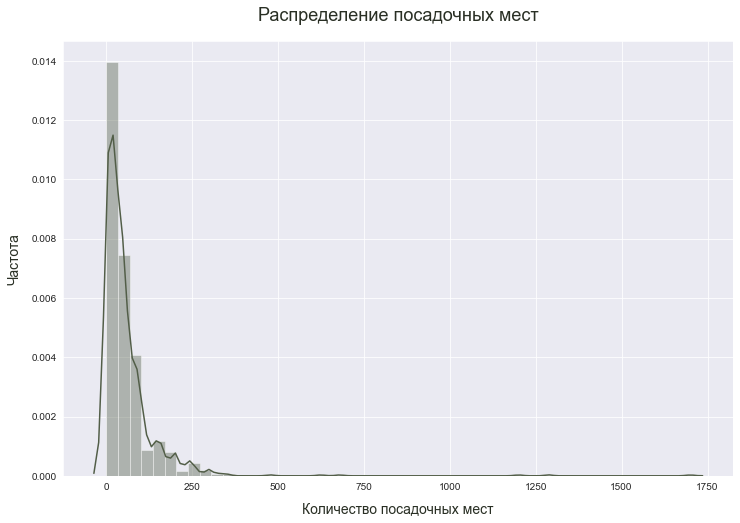

In [37]:

plt.figure(figsize=(12,8))
sns.distplot(rest_data_streets['number'], bins=50, color='#525e48') 
plt.title('Распределение посадочных мест', fontsize=18, color='#292f24', pad=20)
plt.ylabel('Частота', fontsize=14, color='#292f24', labelpad=10)
plt.xlabel('Количество посадочных мест', fontsize=14, color='#292f24', labelpad=10)
plt.show()



Большая часть заведений на топовых улицах с количеством посадочных мест не более 60.

## 3. Вывод<a id="resume"></a> 

    Предварительный анализ данных показал, что они довольно качественные, отсутсвуют пропущенные значения, правда было 82 неявных дубликата, они были выявлены и удалены, вот названия столбцов указаны корректно. Типы данных также верны. В выборке присутсвуют значения  с числом посадоченых мест свыше 1000, при рассмотрении среза выявлено, что данные корректные, их нельзя назвать выбросами, это различные банкетные залы дейстивительно располагающие такитми площадями.
    Самый распростаненный вид заведения это кафе, объектов такого типа в нашей выборке рекордные 6071 штук, следующие по распространенности это столовая - 2584, ресторан - 2282 и предприятия быстрого обслуживания - 1898, меньше всего отделов кулинарии - 273 штуки.  
    Что касаительно сетевого распространения, больше всего оно характерно для фастфуда, сети в этом виде общепита составляют 41,52%, также распространены сетевые магазины с отделами кулинарии 28,57% - вероятно это формат магазинов у дома, они всегда пользуются спросом. У ресторанов и кафе примерно одинаковая доля сетей, у ресторанов 23,79%, кафе 22,99%. Буфеты и столовые практически не представлены в сетевом формате, возможно они часто находятся при каких-то организациях, гос учреждениях или фабриках и прочее, поэтому и не являются сетевыми.
    При этом для сетевых заведений характерно большее количество заведений с меньшим числом посадочных мест.
    В столовых ожидаемо больше посадочных мест в среднем, чем в остальных видах общепита - 103 (это обусловлено спросом в часы пик, когда люди массово отправляются обедать или ужинать, также много посадочных мест в ресторанах - 80 в среднем - поскольку они должны обеспечивать возможность проведения банкетов. Бары, буфеты и кафе - примерно на одном уровне от 30 до 35 мест. А в закусочных и кулинариях посадочные места и вовсе не нужны, поскольку еда продается на вынос.
     Был составлен список топ 10 улиц, на которых находится наибольшее количество заведений общепита, рекордсмены по количеству точек общепита, проспект Мира - 204, Профсоюзная улица - 182, Ленинградский проспект - 171, Пресненская набережаня  - 167, замыкает топ10 Кировогдаская улица со 110 заведениями. Можно провести аналогию, что данные улицы в основном располагаются на Юге и Юго-Западе Москвы, в пределах МКАД, к примеру популярные районы Донской, Проспект Вернандского, Обручевский, Чертаново. 
    Также есть улицы, на которых располагается всего по одному объекту общепита, и таких довольно многго - 551, многие из этих улиц как ни странно находятся в Центральном округе Москвы, но малое колиечество заведений на них обусловлено тем, что это небольшие переулки, проезды, на которых находятся административные здания и прочее. Нет подходящих мест для заведений общепита, либо же это улицы находящиеся уже за МКАД.
    Большая часть заведений на топовых улицах с количеством посадочных мест не более 60.
    


## 4. Рекомендации

Перспективные виды заведений  - ресторан и кафе, рассчитанное не менее чем на 60 посадочных мест, в пределах МКАД предпочтительно вблизи туристических достопримечательностей, в популярных районах, с большим трафиком категории людей, на которых будет рассчитан ресторан, на Юге или Юго-Западе Москвы это районы Гагаринский, Ломоновский вблизи Воробъевых гор, на Северо Востоке Москвы в районе улицы Мира - Останкинский, Мещанский районы, на Сереве - Хорошевский, Беговой, на Западе Москвы - Проспект Вернандского. Поскольку при возможности обслуживания роботами можно позволить довольно болльшое количество посадочных мест, а эти типы заведений кроме того что пользуются большой популярностью, имеют в среднем достаточно высокое колиество посадочных мест в ресторана 80 в кафе 35 мест, могут обеспечить более высокий средний чек, чем другие заведения за счет привлекаемой публики. Рекомендуемое место для открытия ресторана или кафе территориально должно находиться обязательно в пределах МКАД на Юге либо Юго-Западе Москвы, что обусловлено популярностью общепита в данном районе, можно будет переманить гостей. 

## 5. Презентация<a id="presentation"></a> 

Презентация: <https://yadi.sk/d/KckJgEJ1nFK9iw?w=1> 